<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src="Duke-AIPI-Logo.png">

# Introduction to pandas

Data used in this exercise has been modified from the winemag-data-130k file from Kaggle: https://www.kaggle.com/christopheiv/winemagdata130k

In [1]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'wine-ratings.csv':'https://storage.googleapis.com/aipi_datasets/wine-ratings.csv',
        'wineries.csv':'https://storage.googleapis.com/aipi_datasets/wineries.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

### Create a simple DataFrame

In [1]:
import pandas as pd
import numpy as np

# Disable pandas warnings
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Create a DataFrame from a dictionary of lists
population = [38332521, 26448193, 19651127, 19552860, 12882135]
area = [423967, 170312, 149995, 141297, 695662]
state_names = ['California','Florida','Illinois','New York','Texas']
states_df = pd.DataFrame({'Population':population,'Area':area},index=state_names) # Index specifies row names
states_df

,Population,Area
California,38332521,423967
Florida,26448193,170312
Illinois,19651127,149995
New York,19552860,141297
Texas,12882135,695662


In [3]:
# Create a DataFrame from a 2D NumPy array.  You can define the index and column names using lists
state_array = np.array([[38332521,423967],[26448193,170312],[19651127,149995],[19552860,141297],[12882135,695662]])
state_names = ['California','Florida','Illinois','New York','Texas']
states_df = pd.DataFrame(state_array,index=state_names,columns=['Population','Area'])
states_df

,Population,Area
California,38332521,423967
Florida,26448193,170312
Illinois,19651127,149995
New York,19552860,141297
Texas,12882135,695662


# Gather data

### Read in data from a file

Pandas can read in data from a number of different file formats (even Excel files!).  The most common formats we will use are csv files and txt files. Pandas is usually able to infer the header (column names) of the data.  If you know that your file contains dates which you would like pandas to automatically parse into its datetime format, you can set parse_dates=True

In [4]:
# Read in file using pd.read_csv()
wine_df = pd.read_csv('wine-ratings.csv')

# Display header (first five rows)
wine_df.head()

,Unnamed: 0,description,designation,points,price,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Understand data structure and contents

In [5]:
# Display shape of data
wine_df.shape

(129971, 11)

In [6]:
# Get type of each column
wine_df.dtypes

Unnamed: 0                 int64
description               object
designation               object
points                     int64
price                    float64
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [7]:
# Get statistics on any numerical columns
wine_df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [8]:
# We can use .unique() and .nunique() to look at the unique values in a column
# E.g. how many different tasters are there?
wine_df['taster_name'].nunique()

19

In [9]:
# What are the names of the different tasters?
wine_df['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

### Combine dataframes

We can see above that our wine_df dataframe contains information on the winery and region for each wine, but what if we want to know where each wine is from? We can import another file which contains a list of all the wineries and associated location.  We then have to merge this dataframe to our original wine_df.

In [22]:
# Read in the dataframe containing winery locations
wineries = pd.read_csv('wineries.csv')
wineries.head()

,winery,region_1,province,country
0,Nicosia,Etna,Sicily & Sardinia,Italy
1,Quinta dos Avidagos,NaN,Douro,Portugal
2,Rainstorm,Willamette Valley,Oregon,US
3,St. Julian,Lake Michigan Shore,Michigan,US
4,Sweet Cheeks,Willamette Valley,Oregon,US


In [23]:
# Merge wineries onto wines_df
# We can see they share two common columns: 'winery' and 'region_1' so let's use both as the merge keys
# We will do a left merge to preserve all entries in the left dataframe (wine_df) even if there is no corresponding
# entry in the right dataframe (wineries)
wines_wlocations = wine_df.merge(wineries,how='left',on=['winery','region_1'])

# Display the header of our new merged df
wines_wlocations.head()

,Unnamed: 0,description,designation,points,price,region_1,taster_name,taster_twitter_handle,title,variety,winery,province,country
0,0,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Sicily & Sardinia,Italy
1,1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro,Portugal
2,2,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Oregon,US
3,3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Michigan,US
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Oregon,US


### Simplify and clean up columns

We often want to simplify the columns of our dataframe to remove duplicate or unnecessary data from the raw data.  We can do this using the pandas drop() command

In [24]:
# In our dataframe we have a duplicate index column ("Unnamed: 0").  Let's remove it
wines_wlocations = wines_wlocations.drop(labels=['Unnamed: 0'],axis=1) # Set axis 1 to drop it from columns
wines_wlocations.head()

,description,designation,points,price,region_1,taster_name,taster_twitter_handle,title,variety,winery,province,country
0,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Sicily & Sardinia,Italy
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro,Portugal
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Oregon,US
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Michigan,US
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Oregon,US


We often want to rename columns so that they make more sense.  We can do this with the rename() command

In [186]:
# Let's change the "title" column to "name" 
wines_wlocations.rename(columns={'title':'name'},inplace=True) # Specify inplace=True to perform it on original df
wines_wlocations.head()

,description,designation,points,price,region_1,taster_name,taster_twitter_handle,name,variety,winery,province,country
0,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Sicily & Sardinia,Italy
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro,Portugal
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Oregon,US
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Michigan,US
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Oregon,US


# Validate data

### Changing types

In [187]:
# Reminder, you can view the type of all columns using .dtypes
wines_wlocations.dtypes

description               object
designation               object
points                   float64
price                    float64
region_1                  object
taster_name               object
taster_twitter_handle     object
name                      object
variety                   object
winery                    object
province                  object
country                   object
dtype: object

In [188]:
# Let's change the 'points' column from an int to a float
wines_wlocations['points'] = wines_wlocations['points'].astype(float)
wines_wlocations.dtypes

description               object
designation               object
points                   float64
price                    float64
region_1                  object
taster_name               object
taster_twitter_handle     object
name                      object
variety                   object
winery                    object
province                  object
country                   object
dtype: object

### Remove missing data

In [189]:
# Check for missing data
wines_wlocations.isnull().sum()

description                  0
designation              37465
points                       0
price                     8996
region_1                 21247
taster_name              26244
taster_twitter_handle    31213
name                         0
variety                      1
winery                       0
province                    45
country                     45
dtype: int64

In [190]:
# Drop rows for which 'country' or 'price' is blank
wines_wloc_clean = wines_wlocations.dropna(axis=0,subset=['country','price']) # Axis=0 drops rows with missing values

# Check the original shape
print('Dataframe shape before removing missing data was {}'.format(wines_wlocations.shape))
# Check the new shape after dropping rows missing the country
print('Dataframe shape after removing missing data is {}'.format(wines_wloc_clean.shape))

Dataframe shape before removing missing data was (129971, 12)
Dataframe shape after removing missing data is (120934, 12)


### Create new derivative columns

Let's say we want to define a new column 'points-price ratio' which stores the ratio of the wine's points to it's price.

In [191]:
# Define new column 'points-price ratio' as ratio of two existing columns 'points' and 'price'
wines_wloc_clean['points-price ratio'] = wines_wloc_clean['points'] / wines_wloc_clean['price']

wines_wloc_clean.head()

,description,designation,points,price,region_1,taster_name,taster_twitter_handle,name,variety,winery,province,country,points-price ratio
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro,Portugal,5.800000
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Oregon,US,6.214286
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Michigan,US,6.692308
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Oregon,US,1.338462
5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Northern Spain,Spain,5.800000


Now suppose we also want to create a column 'vintage_year' which contains the vintage year of the wine.  If we look at our dataframe, we can see that the year is contained in the 'name' column strings.  We will need to parse it out using a regular expression and store it in a new column.  We can use the .map() method to map a lambda function (for example, containing a regular expression in this case) to each row of the dataframe

In [207]:
# Create a new column 'vintage_year' that parses the year from the 'name' column

import re # Import regular expressions

# Write a function to find a pattern of 4 digits in a string (first two being 19 or 20)
# Return the first instance of the pattern as 'year'
def find_year(x):
    pattern = r'\b(19)\d{2}\b|\b(20)\d{2}\b' # regular expression pattern for 4 digits in a row
    m = re.search(pattern,x) # Searches the input string x for the pattern
    year = m.group() if m else None # Sets 'year' to the first found instance of the pattern
    return year

# Apply this function to the 'name' column using the .map() method
wines_wloc_clean['vintage_year'] = wines_wloc_clean['name'].map(lambda x: find_year(x))

wines_wloc_clean.head()

,description,designation,points,price,region_1,taster_name,taster_twitter_handle,name,variety,winery,province,country,points-price ratio,vintage_year
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro,Portugal,5.800000,2011
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Oregon,US,6.214286,2013
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Michigan,US,6.692308,2013
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Oregon,US,1.338462,2012
5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Northern Spain,Spain,5.800000,2011


# Explore data

### Slicing data

We slice data in pandas using one of two ways:  
    1) Using the integer index values and .iloc[ ]  
    2) Using the labeled string indices and .loc[ ]

In [208]:
# Get the first three columns in the dataframe using .iloc[ ]
wines_wloc_clean.iloc[:,:3]

,description,designation,points
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0
5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0
...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90.0
129967,Citation is given as much as a decade of bottl...,NaN,90.0
129968,Well-drained gravel soil gives this wine its c...,Kritt,90.0
129969,"A dry style of Pinot Gris, this is crisp with ...",NaN,90.0


In [209]:
# Get the first three columns in the dataframe using .loc[ ]
wines_wloc_clean.loc[:,['description','designation','points']]

,description,designation,points
1,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0
5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0
...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90.0
129967,Citation is given as much as a decade of bottl...,NaN,90.0
129968,Well-drained gravel soil gives this wine its c...,Kritt,90.0
129969,"A dry style of Pinot Gris, this is crisp with ...",NaN,90.0


### Filtering data

We can use Boolean masks to filter dataframes based on conditions.

In [210]:
# Filter the dataframe to get all wines produced in the US
US_wines = wines_wloc_clean[wines_wloc_clean['country']=='US']

US_wines.head()

,description,designation,points,price,region_1,taster_name,taster_twitter_handle,name,variety,winery,province,country,points-price ratio,vintage_year
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Oregon,US,6.214286,2013
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Michigan,US,6.692308,2013
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Oregon,US,1.338462,2012
10,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87.0,19.0,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,California,US,4.578947,2011
12,"Slightly reduced, this wine offers a chalky, t...",NaN,87.0,34.0,Alexander Valley,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,California,US,2.558824,2012


We can also use multiple conditions together to filter a dataframe

In [211]:
# Filter the dataframe to get all wines produced in France with a point score > 90
Best_french_wines = wines_wloc_clean[(wines_wloc_clean['country']=='France') & (wines_wloc_clean['points']>90)]

Best_french_wines.head()

,description,designation,points,price,region_1,taster_name,taster_twitter_handle,name,variety,winery,province,country,points-price ratio,vintage_year
119,Medium-gold in color. Complex and inviting nos...,Schoenenbourg Grand Cru Vendanges Tardives,92.0,80.0,Alsace,NaN,NaN,Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...,Riesling,Dopff & Irion,Alsace,France,1.150000,2004
126,Mid-gold color. Pronounced and enticing aromas...,Vendages Tardives,91.0,48.0,Alsace,NaN,NaN,Pierre Sparr 2007 Vendages Tardives Gewurztram...,Gewürztraminer,Pierre Sparr,Alsace,France,1.895833,2007
127,Attractive mid-gold color with intense aromas ...,Alsace One,91.0,13.0,Alsace,NaN,NaN,Pierre Sparr 2008 Alsace One White (Alsace),White Blend,Pierre Sparr,Alsace,France,7.000000,2008
128,"Compelling minerality on the nose, Refined and...",NaN,91.0,17.0,Alsace,NaN,NaN,Kuentz-Bas 2008 Pinot Blanc (Alsace),Pinot Blanc,Kuentz-Bas,Alsace,France,5.352941,2008
131,Attractive mid-gold color. Compelling layers o...,Gentil,91.0,20.0,Alsace,NaN,NaN,Dopff & Irion 2008 Gentil White (Alsace),Alsace white blend,Dopff & Irion,Alsace,France,4.550000,2008


### Sorting data

Let's sort our US_wines dataframe by 'points-price ratio' to see which American wine gives us the best ratio of quality to price

In [212]:
# Sort the dataframe by 'points-price ratio'. Set ascending=False to display highest values first
US_wines.sort_values(by='points-price ratio',ascending=False)

,description,designation,points,price,region_1,taster_name,taster_twitter_handle,name,variety,winery,province,country,points-price ratio,vintage_year
64590,"There's a lot going on in this Merlot, which i...",NaN,86.0,4.0,California,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,California,US,21.500000,None
20484,"Fruity, soft and rather sweet, this wine smell...",NaN,85.0,4.0,Clarksburg,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,California,US,21.250000,2015
31530,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84.0,4.0,California,NaN,NaN,Bandit NV Chardonnay (California),Chardonnay,Bandit,California,US,21.000000,None
110255,"A good everyday Merlot, dry and rich in tannin...",NaN,84.0,4.0,California,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,California,US,21.000000,None
59507,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83.0,4.0,California,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,California,US,20.750000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38978,We can debate the pricing on Yao Ming's new re...,Family Reserve,98.0,625.0,Napa Valley,NaN,NaN,Yao Ming 2010 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,California,US,0.156800,2010
83852,The former basketball star's initial release i...,Family Reserve,97.0,625.0,Napa Valley,NaN,NaN,Yao Ming 2009 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,California,US,0.155200,2009
25382,"As imposing as the athlete himself, this is an...",Family Reserve,94.0,625.0,Napa Valley,Virginie Boone,@vboone,Yao Ming 2011 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,California,US,0.150400,2011
51978,"This is a powerful bottling, as is expected by...",Intrepid,92.0,750.0,Paso Robles,Matt Kettmann,@mattkettmann,Law 2013 Intrepid Syrah (Paso Robles),Syrah,Law,California,US,0.122667,2013


### Grouping data and aggregations

We can use the pandas groupby() method to group data according to common values in one or more columns

In [213]:
# Group the dataframe by country and display the mean 'points' score for each country's wines
wines_wloc_clean.groupby('country')['points'].mean()

country
Argentina                 86.710330
Armenia                   87.500000
Australia                 88.595466
Austria                   90.188612
Bosnia and Herzegovina    86.500000
Brazil                    84.659574
Bulgaria                  87.936620
Canada                    89.377953
Chile                     86.499548
China                     89.000000
Croatia                   87.273973
Cyprus                    87.181818
Czech Republic            87.250000
England                   91.550725
France                    88.734867
Georgia                   87.714286
Germany                   89.838208
Greece                    87.290393
Hungary                   89.228571
India                     90.222222
Israel                    88.521298
Italy                     88.618186
Lebanon                   87.685714
Luxembourg                88.666667
Macedonia                 86.833333
Mexico                    85.257143
Moldova                   87.203390
Morocco             

In [214]:
# Display the number of wines per country in the dataset
wines_wloc_clean['country'].value_counts()

US                        54267
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4869
Chile                      4428
Argentina                  3756
Austria                    2810
Australia                  2294
Germany                    2120
New Zealand                1375
South Africa               1296
Israel                      493
Greece                      458
Canada                      254
Bulgaria                    142
Hungary                     140
Romania                     119
Uruguay                     110
Turkey                       90
Georgia                      84
Slovenia                     79
Croatia                      73
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      29
Peru                         16
Ukraine                      14
Macedoni

After grouping, we can also use the agg() method to compute multiple aggregate statistics on the groups

In [228]:
# Let's look at the reviews by taster and see if there are any notable differences in points awarded
wines_wloc_clean.groupby('taster_name')['points'].agg(['count','min','median','max'])

,count,min,median,max
taster_name,,,,
Alexander Peartree,413,80.0,86.0,91.0
Anna Lee C. Iijima,4369,80.0,88.0,98.0
Anne Krebiehl MW,3398,80.0,90.0,97.0
Carrie Dykes,138,81.0,87.0,92.0
Christina Pickard,6,82.0,88.0,93.0
Fiona Adams,27,82.0,87.0,91.0
Jeff Jenssen,470,82.0,89.0,97.0
Jim Gordon,4171,80.0,89.0,97.0
Joe Czerwinski,5012,80.0,89.0,100.0


### Calculating statistics

In [216]:
# We can calculate statistics on individual rows, or use the describe() method
wines_wloc_clean.describe()

,points,price,points-price ratio
count,120934.000000,120934.000000,120934.000000
mean,88.421949,35.367407,3.840376
std,3.044866,41.028377,2.216633
min,80.000000,4.000000,0.026667
25%,86.000000,17.000000,2.119048
50%,88.000000,25.000000,3.458333
75%,91.000000,42.000000,5.117647
max,100.000000,3300.000000,21.500000


### Visualizations

Visualizations are a great way to explore your data.  We will use the matplotlib library for visualizations, although there are other popular options such as seaborn or plotly.  In this exercise we will cover only a couple simple visualizations, but we will discuss visual analysis techniques in much greater detail in a later lecture.

In [217]:
import matplotlib.pyplot as plt

In [223]:
# Create a bar chart of the count of wines in the dataset by country

counts_by_year = wines_wloc_clean['vintage_year'].value_counts()
counts_by_year.sort_index(inplace=True)
counts_by_year

1904        1
1919        1
1927        2
1929        6
1934        1
1935        1
1941        1
1945        1
1947        1
1952        2
1957        1
1961        1
1963        3
1964        2
1965        1
1966        1
1967        1
1968        1
1969        1
1973        1
1974        1
1976        1
1978        2
1980        2
1982        1
1983        2
1984        2
1985        4
1986        4
1987        2
1988        5
1989        6
1990        5
1991        4
1992       14
1993        3
1994       23
1995       45
1996       64
1997      297
1998      541
1999      619
2000      734
2001      668
2002      333
2003      499
2004     1604
2005     3292
2006     5170
2007     6498
2008     6725
2009     9056
2010    11102
2011    11434
2012    14735
2013    15190
2014    14881
2015     9626
2016     3549
2017       11
Name: vintage_year, dtype: int64

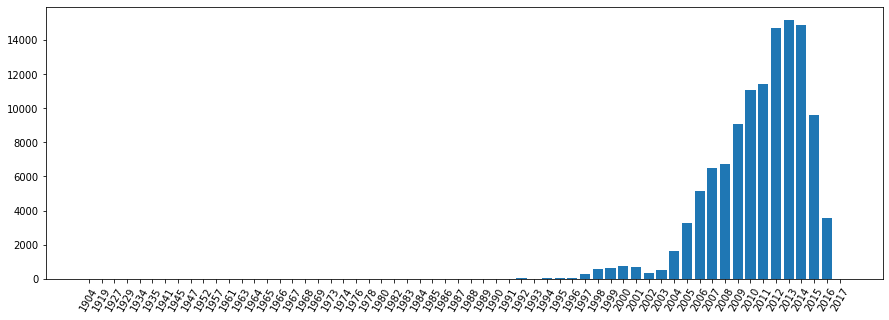

In [227]:
plt.figure(figsize=(15,5))
plt.bar(x=counts_by_year.index, height = counts_by_year)
plt.xticks(rotation='60')
plt.show()